In [10]:
import pandas as pd
import os

df_download = pd.read_csv(os.path.join('data', 'merged_download.csv'))
df_download.head(5)

,chipsettime,cellid,mcs0,mcs1,mcsindex,tbs0,tbs1,mimo,rnti,throughput,...,gpstime,longitude,latitude,speed,rsrq,rsrp,rssi,earfcn,cqi,operator
0,1.523008e+09,385.0,QPSK,QPSK,1,208.0,0.0,1,65534.0,0.208,...,1.523008e+09,8.43389,49.976584,0.0,-6.1250,-84.4375,-58.3750,1300.0,12,telekom
1,1.523008e+09,385.0,QPSK,QPSK,1,120.0,0.0,1,65534.0,0.120,...,1.523008e+09,8.43389,49.976584,0.0,-6.9375,-85.6875,-58.8125,1300.0,10,telekom
2,1.523008e+09,385.0,16QAM,16QAM,2,28336.0,28336.0,2,29150.0,56.672,...,1.523008e+09,8.43389,49.976584,0.0,-6.5625,-85.4375,-58.8750,1300.0,10,telekom
3,1.523008e+09,385.0,16QAM,16QAM,2,30576.0,30576.0,2,29150.0,61.152,...,1.523008e+09,8.43389,49.976584,0.0,-6.5625,-85.4375,-58.8750,1300.0,10,telekom
4,1.523008e+09,385.0,16QAM,16QAM,2,30576.0,30576.0,2,29150.0,61.152,...,1.523008e+09,8.43389,49.976584,0.0,-6.5625,-85.4375,-58.8750,1300.0,10,telekom


<Axes: title={'center': 'Mean download speed'}, xlabel='operator'>

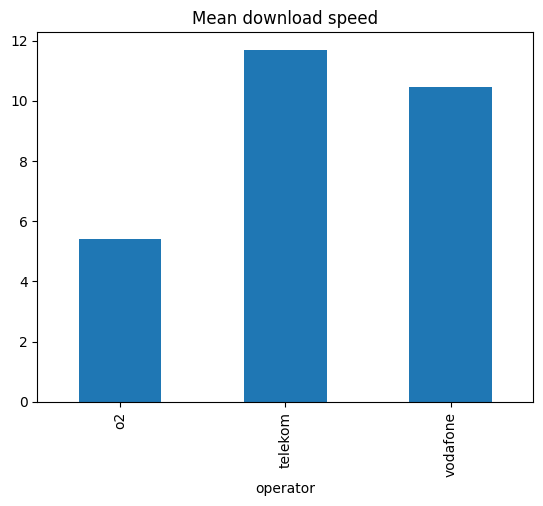

In [3]:
df_download['speed'].groupby(df_download['operator']).mean().plot(kind='bar', title='Mean download speed')

<Axes: title={'center': 'Median download speed'}, xlabel='operator'>

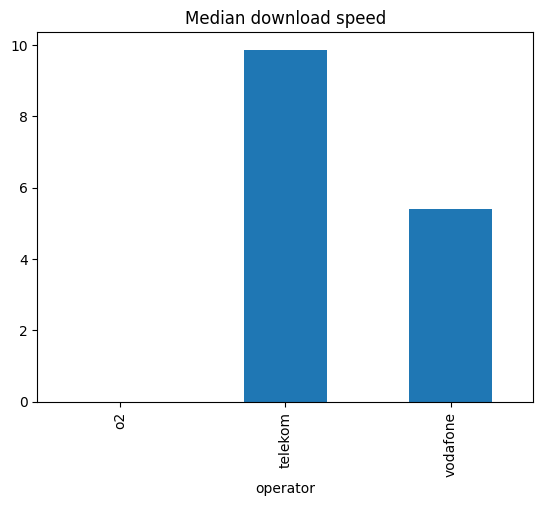

In [4]:
df_download['speed'].groupby(df_download['operator']).median().plot(kind='bar', title='Median download speed')

<Axes: title={'center': 'Std download speed'}, xlabel='operator'>

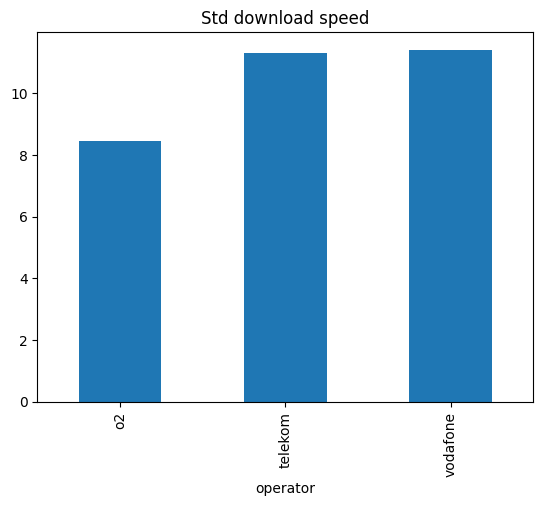

In [5]:
df_download['speed'].groupby(df_download['operator']).std().plot(kind='bar', title='Std download speed')

In [7]:
df_download

,chipsettime,cellid,mcs0,mcs1,mcsindex,tbs0,tbs1,mimo,rnti,throughput,...,gpstime,longitude,latitude,speed,rsrq,rsrp,rssi,earfcn,cqi,operator
0,1.523008e+09,385.0,QPSK,QPSK,1,208.0,0.0,1,65534.0,0.208,...,1.523008e+09,8.433890,49.976584,0.000000,-6.1250,-84.4375,-58.3750,1300.0,12,telekom
1,1.523008e+09,385.0,QPSK,QPSK,1,120.0,0.0,1,65534.0,0.120,...,1.523008e+09,8.433890,49.976584,0.000000,-6.9375,-85.6875,-58.8125,1300.0,10,telekom
2,1.523008e+09,385.0,16QAM,16QAM,2,28336.0,28336.0,2,29150.0,56.672,...,1.523008e+09,8.433890,49.976584,0.000000,-6.5625,-85.4375,-58.8750,1300.0,10,telekom
3,1.523008e+09,385.0,16QAM,16QAM,2,30576.0,30576.0,2,29150.0,61.152,...,1.523008e+09,8.433890,49.976584,0.000000,-6.5625,-85.4375,-58.8750,1300.0,10,telekom
4,1.523008e+09,385.0,16QAM,16QAM,2,30576.0,30576.0,2,29150.0,61.152,...,1.523008e+09,8.433890,49.976584,0.000000,-6.5625,-85.4375,-58.8750,1300.0,10,telekom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256795,1.523180e+09,48.0,16QAM,16QAM,2,11832.0,0.0,1,11387.0,11.832,...,1.523180e+09,8.427837,49.974765,26.959999,-11.2500,-86.3125,-56.8125,6300.0,10,vodafone
256796,1.523180e+09,48.0,64QAM,64QAM,3,12216.0,0.0,1,11387.0,12.216,...,1.523180e+09,8.427837,49.974765,26.959999,-11.2500,-86.3125,-56.8125,6300.0,10,vodafone
256797,1.523180e+09,48.0,64QAM,64QAM,3,12216.0,0.0,1,11387.0,12.216,...,1.523180e+09,8.427837,49.974765,26.959999,-13.6875,-87.2500,-55.3750,6300.0,10,vodafone
256798,1.523180e+09,48.0,16QAM,16QAM,2,11832.0,0.0,1,11387.0,11.832,...,1.523180e+09,8.427837,49.974765,26.959999,-13.6875,-87.2500,-55.3750,6300.0,10,vodafone


In [15]:
df_download['date'] = pd.to_datetime(df_download['chipsettime'], unit='s')
df_download['date'] = pd.to_datetime(df_download['date'], format='%Y-%m-%d %H')


In [16]:
df_download.describe()

,chipsettime,cellid,mcsindex,tbs0,tbs1,mimo,rnti,throughput,rb0,rb1,...,caindex,gpstime,longitude,latitude,speed,rsrq,rsrp,rssi,earfcn,cqi
count,2.568000e+05,256800.000000,256800.000000,256800.000000,256800.000000,256800.000000,256800.000000,256800.000000,256800.000000,256800.000000,...,256800.000000,2.568000e+05,256800.000000,256800.000000,256800.000000,256800.000000,256800.000000,256800.000000,256800.000000,256800.000000
mean,1.523076e+09,266.717072,2.287185,23931.454953,19479.315016,1.644505,27415.724825,43.410770,69.046791,69.046791,...,0.147212,1.523076e+09,8.391705,49.975612,9.968615,-11.854311,-95.573015,-64.146755,3199.718263,10.360456
std,6.046627e+04,161.450446,0.771085,18557.375484,20770.313505,0.478664,18352.763602,38.252421,31.498316,31.498316,...,0.354318,6.047240e+04,0.029783,0.002487,11.090921,2.456052,9.724559,8.988445,2181.477576,2.859713
min,1.523008e+09,32.000000,1.000000,16.000000,0.000000,1.000000,2.000000,0.016000,5.000000,5.000000,...,0.000000,1.523007e+09,8.330305,49.971057,0.000000,-30.000000,-123.062500,-91.687500,1300.000000,1.000000
25%,1.523016e+09,128.000000,2.000000,8760.000000,0.000000,1.000000,14003.000000,11.448000,48.000000,48.000000,...,0.000000,1.523016e+09,8.378877,49.974630,0.000000,-13.312500,-103.000000,-71.062500,1300.000000,8.000000
50%,1.523089e+09,181.000000,2.000000,18336.000000,12576.000000,2.000000,24105.000000,30.528000,84.000000,84.000000,...,0.000000,1.523089e+09,8.380009,49.974960,4.081764,-11.750000,-96.812500,-65.562500,1600.000000,10.000000
75%,1.523103e+09,425.000000,3.000000,36696.000000,32856.000000,2.000000,41992.000000,65.712000,100.000000,100.000000,...,0.000000,1.523103e+09,8.417018,49.976512,22.260002,-10.562500,-88.187500,-57.500000,6200.000000,13.000000
max,1.523188e+09,494.000000,3.000000,63776.000000,63776.000000,2.000000,65535.000000,127.552000,100.000000,100.000000,...,1.000000,1.523188e+09,8.439905,49.983627,31.440058,-0.312500,-57.437500,-26.375000,6400.000000,15.000000


<Axes: xlabel='date', ylabel='speed'>

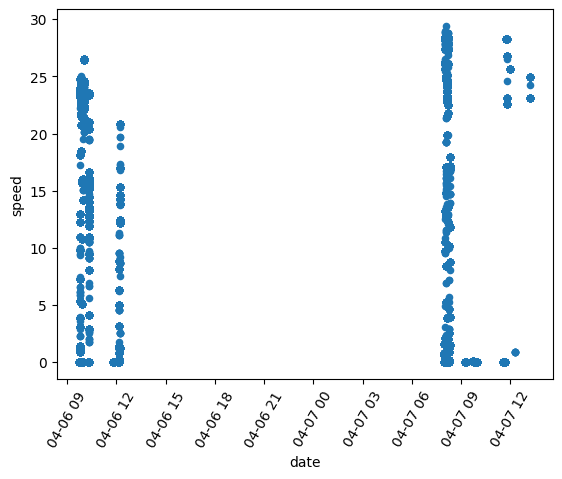

In [17]:
df_download[df_download['operator'] == 'o2'].plot.scatter(x='date', y='speed', rot=60)


<Axes: xlabel='date', ylabel='speed'>

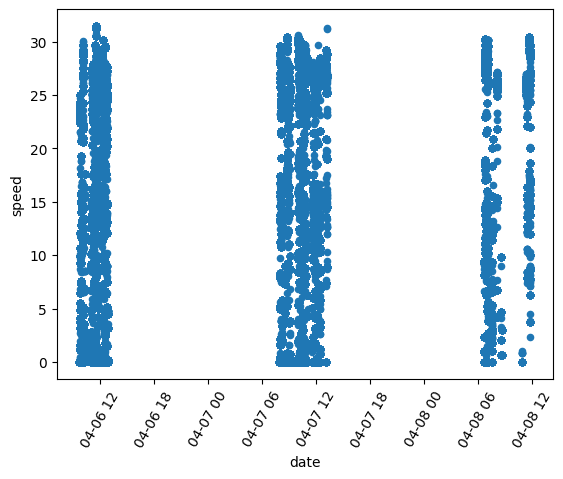

In [18]:
df_download[df_download['operator'] == 'telekom'].plot.scatter(x='date', y='speed', rot=60)

<Axes: xlabel='date', ylabel='speed'>

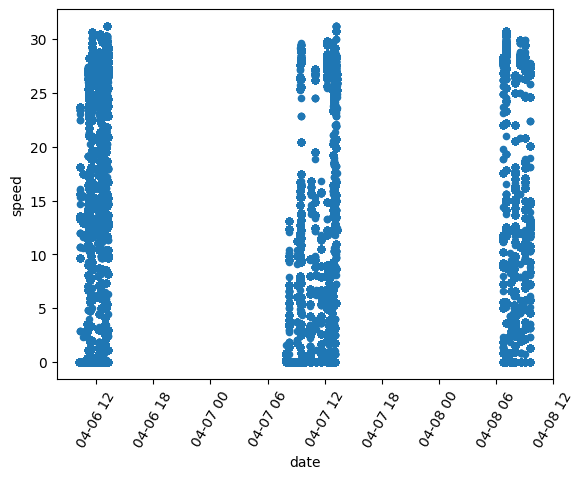

In [19]:
df_download[df_download['operator'] == 'vodafone'].plot.scatter(x='date', y='speed', rot=60)

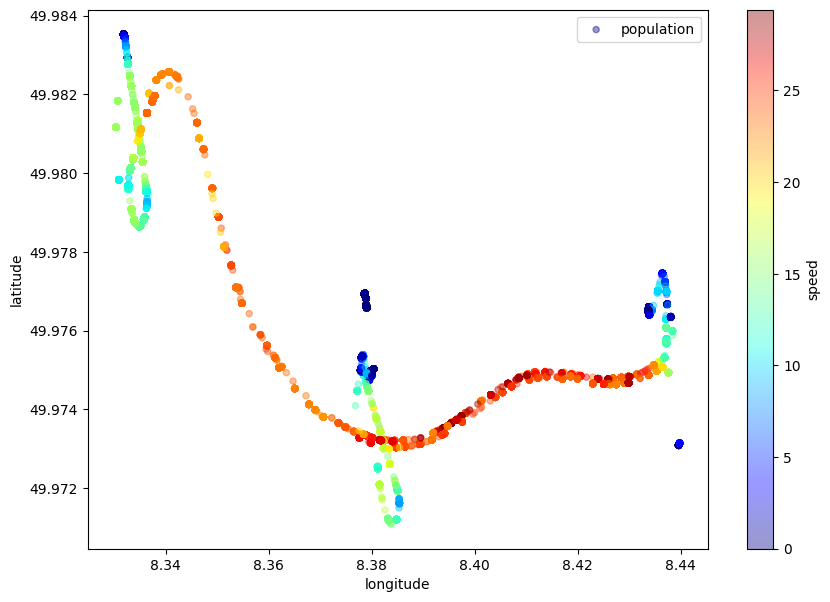

In [20]:
import matplotlib.pyplot as plt

df_download[df_download['operator'] == 'o2'].plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             label='population', figsize=(10,7),
             c='speed', cmap=plt.get_cmap('jet'), colorbar=True)

plt.legend()

In [11]:
# df_download['time'] = df_download['date'].dt.hour
df_download = df_download.drop(['mcs0', 'mcs1', 'operator'], axis=1)

df_download.head(5)

,chipsettime,cellid,mcsindex,tbs0,tbs1,mimo,rnti,throughput,rb0,rb1,...,caindex,gpstime,longitude,latitude,speed,rsrq,rsrp,rssi,earfcn,cqi
0,1.523008e+09,385.0,1,208.0,0.0,1,65534.0,0.208,12,12,...,0,1.523008e+09,8.43389,49.976584,0.0,-6.1250,-84.4375,-58.3750,1300.0,12
1,1.523008e+09,385.0,1,120.0,0.0,1,65534.0,0.120,8,8,...,0,1.523008e+09,8.43389,49.976584,0.0,-6.9375,-85.6875,-58.8125,1300.0,10
2,1.523008e+09,385.0,2,28336.0,28336.0,2,29150.0,56.672,100,100,...,0,1.523008e+09,8.43389,49.976584,0.0,-6.5625,-85.4375,-58.8750,1300.0,10
3,1.523008e+09,385.0,2,30576.0,30576.0,2,29150.0,61.152,100,100,...,0,1.523008e+09,8.43389,49.976584,0.0,-6.5625,-85.4375,-58.8750,1300.0,10
4,1.523008e+09,385.0,2,30576.0,30576.0,2,29150.0,61.152,100,100,...,0,1.523008e+09,8.43389,49.976584,0.0,-6.5625,-85.4375,-58.8750,1300.0,10


Index(['speed', 'longitude', 'earfcn', 'rssi', 'rsrp', 'cellid', 'rsrq',
       'mimo', 'gpstime', 'chipsettime', 'rb0', 'rb1', 'rnti', 'cqi', 'scc',
       'tbs1', 'tbs0', 'mcsindex', 'throughput', 'tp_cleaned'],
      dtype='object')


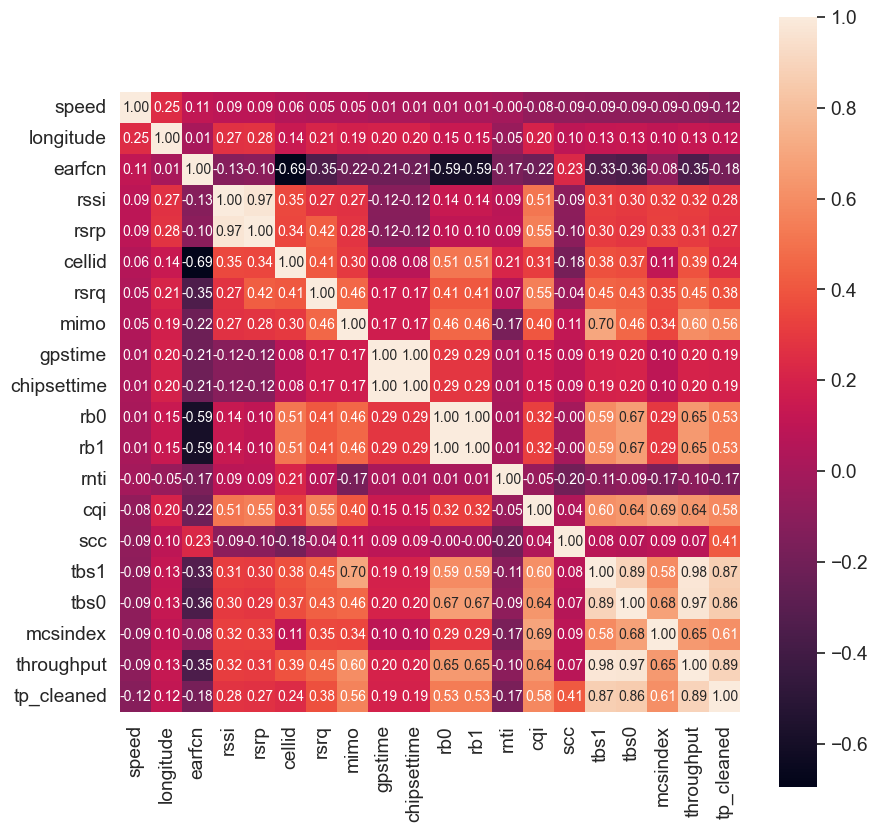

In [14]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Correlation matrix
corrmat = df_download.corr()

# Saleprice correlation matrix
k = 20 # numbers of variables in heatmap
cols = corrmat.nlargest(k, 'speed')['speed'].index
print(cols)
f, ax = plt.subplots(figsize=(10, 10))
cm = np.corrcoef(df_download[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)